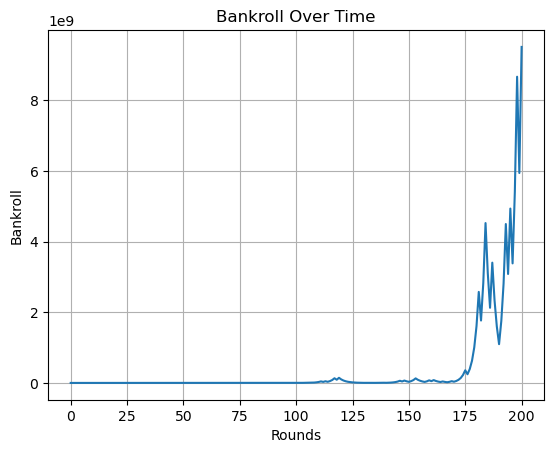

Max Drawdown: 99.19%


In [4]:
import random
import matplotlib.pyplot as plt

# --- ev_calculator.py ---
def expected_value(prob_win, odds):
    prob_loss = 1 - prob_win
    return (prob_win * odds) - (prob_loss * 1)

# --- kelly.py ---
def kelly_fraction(prob_win, odds):
    prob_loss = 1 - prob_win
    return (odds * prob_win - prob_loss) / odds

# --- risk_metrics.py ---
def calculate_drawdown(bankroll_history):
    peak = bankroll_history[0]
    max_drawdown = 0
    for value in bankroll_history:
        peak = max(peak, value)
        drawdown = (peak - value) / peak
        max_drawdown = max(max_drawdown, drawdown)
    return max_drawdown

# --- visualization.py ---
def plot_bankroll(bankroll_history):
    plt.plot(bankroll_history)
    plt.title("Bankroll Over Time")
    plt.xlabel("Rounds")
    plt.ylabel("Bankroll")
    plt.grid(True)
    plt.show()

# --- betting_simulator.py ---
def simulate_betting(prob_win, odds, bankroll, n_rounds, strategy='kelly'):
    bankroll_history = [bankroll]
    for _ in range(n_rounds):
        if strategy == 'kelly':
            bet_fraction = kelly_fraction(prob_win, odds)
        elif strategy == 'fixed':
            bet_fraction = 0.05  # example
        else:
            raise ValueError("Invalid strategy")

        bet_size = bankroll * bet_fraction
        win = random.random() < prob_win
        bankroll += bet_size * odds if win else -bet_size
        bankroll_history.append(bankroll)
    return bankroll_history

# --- run simulation ---
history = simulate_betting(prob_win=0.55, odds=1.91, bankroll=1000, n_rounds=200, strategy='kelly')
plot_bankroll(history)
print(f"Max Drawdown: {calculate_drawdown(history):.2%}")
